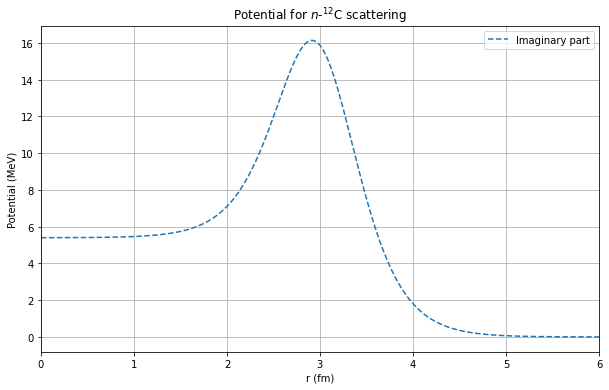

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def woods_saxon(r, R, a):
    return 1 / (1 + np.exp((r - R) / a))

def woods_saxon_derivative(r, R, a):
    exponent = np.exp((r - R) / a)
    return -exponent / (a * (1 + exponent) ** 2)

def get_parameters(Elab):
    if 160 <= Elab < 200:
        V = 31.304 - 0.145 * Elab
        R_R = 1.647 - 0.005 * (Elab - 5)
        a_R = 0.288
        Wsur = 12.7 - 0.025 * (Elab - 160)
        Wvol = 4.8 - 0.025 * (Elab - 160)
    elif 200 <= Elab < 215:
        V = 31.304 - 0.145 * Elab
        R_R = 1.647 - 0.005 * (Elab - 5)
        a_R = 0.288
        Wsur = 11.7
        Wvol = 3.8
    elif 215 <= Elab < 220:
        V = 0
        R_R = 1.647 - 0.005 * (Elab - 5)
        a_R = 0.288
        Wsur = 11.7
        Wvol = 3.8
    elif 220 <= Elab <= 500:
        V = 31.304 - 0.145 * Elab
        R_R = 0.1
        a_R = 0.288
        Wsur = 11.7 + 0.02 * (Elab - 220)
        Wvol = 3.8 + 0.02 * (Elab - 220)
    else:
        raise ValueError("Energy out of range")
    return V, R_R, a_R, Wsur, Wvol


def potential(r, Elab, A):
    V, R_R, a_R, Wsur, Wvol = get_parameters(Elab)
    rI = 1.3
    R_I = rI * A **(1 / 3)
    a_I = 0.3
    a_R = 0.288  
    
    V_WS = V * woods_saxon(r, R_R, a_R)
    W_WS_vol = Wvol * woods_saxon(r, R_I, a_I)
    W_WS_sur = 4 * a_I * Wsur * woods_saxon_derivative(r, R_I, a_I)
    W_WS = W_WS_vol - W_WS_sur
    
    U_AB = (V_WS + 1j * W_WS)
    return U_AB

def plot_potential(Elab, A):
    r = np.linspace(0, 10, 500)
    U_AB = potential(r, Elab, A)
    
    plt.figure(figsize=(10, 6))
    #plt.plot(r, U_AB.real, label='Real part')
    plt.plot(r, U_AB.imag, label="Imaginary part", linestyle="dashed")
    plt.title("Potential for $n$-$_{}^{12}$C scattering")
    plt.xlabel("r (fm)")
    plt.ylabel("Potential (MeV)")
    plt.legend()
    plt.grid(True)
    plt.xlim(0,6)
    plt.show()

Elab = 300  
A = 12
plot_potential(Elab, A)